In [1]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Example formatting in HTML - This is a big headline!</h1>
<h2>Edit this cell to see them - This is a smaller headline<h2>
<hr>
<b>Things can be bold....</b>

<i>Or italic</i>
<ul>
<li>Things can be in a list
<li>all sorts of things!
</ul>

<ol>
<li>Lists can have numbers
<li>they count automatically!
</ol>



<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

In [2]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,340.015425,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,2119.726679,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,2847.853392,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,1975.143045,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,9759.305728,NaN,8.84375


In [18]:
#Retrieving rows with NaN values
row_na = []

for i in dfLE.index.to_list():
    if dfLE.loc[i].isna().sum()>0:
        row_na.append(i)
    else:
        pass

In [4]:
#Dropping all rows with NaN
dfLE_clean = dfLE.drop(dfLE.index[row_na])
dfLE_clean.head()
dfLE_clean.describe(include='all')

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
count,133,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,1.330000e+02,133.000000
unique,133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Malaysia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.142857,68.139709,174.300282,35.902726,4.436893,77.272061,2657.467105,36.691964,49.817199,80.572006,80.699919,5408.637801,1.340066e+07,11.691823
std,NaN,0.351250,9.254200,97.065845,133.819254,3.736886,17.174868,8473.612218,15.971021,181.414641,15.732438,16.431339,8750.957195,3.972571e+07,3.006460
min,NaN,0.000000,46.112500,18.750000,0.000000,0.010000,9.000000,0.000000,12.875000,0.000000,32.875000,26.812500,137.815321,3.334250e+03,4.018750
25%,NaN,0.000000,60.862500,114.312500,0.687500,1.074667,66.500000,15.125000,19.293750,1.000000,69.625000,70.500000,716.770068,1.007302e+06,9.868750
50%,NaN,0.000000,70.731250,154.312500,3.312500,3.807333,79.600000,251.937500,39.743750,4.000000,84.375000,84.500000,2158.280869,3.735507e+06,12.000000
75%,NaN,0.000000,74.262500,227.750000,23.250000,7.130000,91.812500,1880.812500,50.893750,35.562500,94.812500,95.000000,5179.256189,1.124072e+07,13.725000


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Note: you'll have to look at the units to ensure you get it right. 

In [5]:
#Part 1
dfLE_clean["GDP_per_Capita"] = 1000000*dfLE_clean["GDP"]/dfLE_clean["Population"]
dfLE_clean["GDP_per_Capita"].describe()

count    1.330000e+02
mean     2.209586e+04
std      1.175431e+05
min      1.988100e+00
25%      1.095199e+02
50%      6.279519e+02
75%      4.676255e+03
max      1.145174e+06
Name: GDP_per_Capita, dtype: float64

In [49]:
dfLE_clean.head()

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling,GDP_per_Capita
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.375,52.3125,340.015425,9.972260e+06,8.21250,34.096126
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.125,98.0625,2119.726679,6.969116e+05,12.13750,3041.600402
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.750,91.8750,2847.853392,2.164983e+07,12.71250,131.541621
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.125,47.6875,1975.143045,1.014710e+07,8.04375,194.651004
5,Argentina,0.0,75.15625,106.0000,10.1250,7.966667,81.285714,2.0000,54.98125,11.3750,93.375,92.3750,6998.575103,2.012120e+07,16.50625,347.820882


<h2>Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)</h2>
Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options
<li>5 points are for doing it in an efficient way - just listing off each column is lots of typing...
</ul>

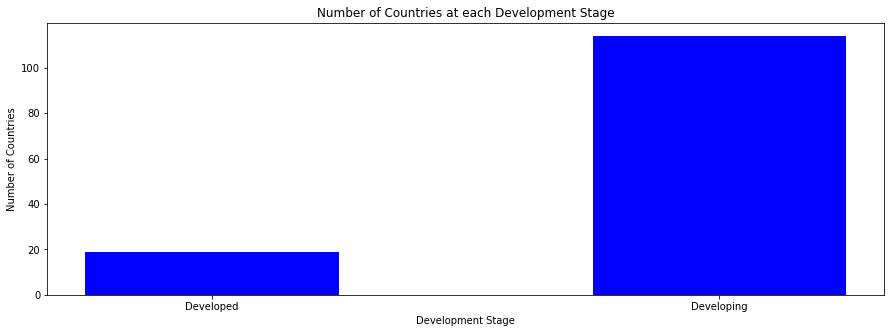

In [8]:
#Print all distributions
#Is developed
dev_dict = {'Developed':dfLE_clean[dfLE_clean["isDeveloped"]==1]["isDeveloped"].count(), 'Developing':dfLE_clean[dfLE_clean["isDeveloped"]==0]["isDeveloped"].count()}
dev_label = list(dev_dict.keys())
dev_count = list(dev_dict.values())
plt.bar(dev_label, dev_count, color = 'blue', width = 0.5)
plt.title('Number of Countries at each Development Stage')
plt.xlabel('Development Stage')
plt.ylabel('Number of Countries')
plt.show()

In [86]:
col_plotting = dfLE_clean.columns[2:16]
col_plotting

Index(['Lifeexpectancy', 'AdultMortality', 'infantdeaths', 'Alcohol',
       'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio',
       'Diphtheria', 'GDP', 'Population', 'Schooling', 'GDP_per_Capita'],
      dtype='object')

In [93]:
dfLE_clean["Lifeexpectancy"].mean()

68.13970864661654

/Users/mariachristellaflorendo/Documents/School/Default_Git/Asn 2/3450_Asn2_Students/thinkplot.py:182: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  return plt.subplot(rows, cols, plot_number, **options)


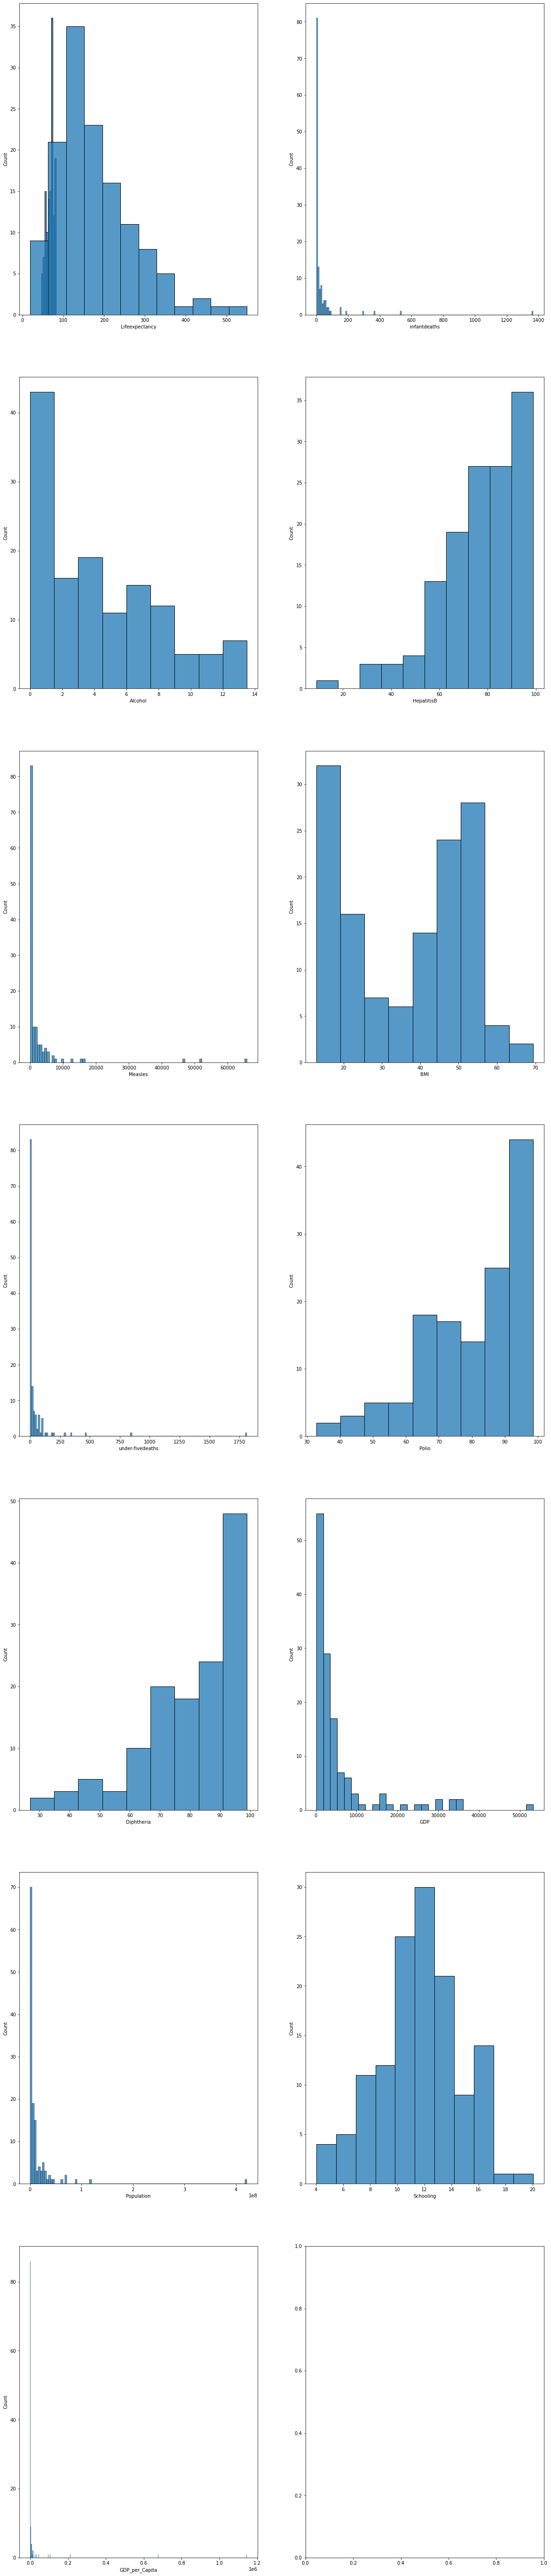

In [92]:
# Plotting
plt.rcParams["figure.figsize"] = (20,100)
thinkplot.preplot(14, 7, 2)
x = 0
for col in col_plotting:
    x += 1
    sns.histplot(data = dfLE_clean, x = col)
    thinkplot.subplot(x)
    

<AxesSubplot:xlabel='Alcohol', ylabel='Count'>

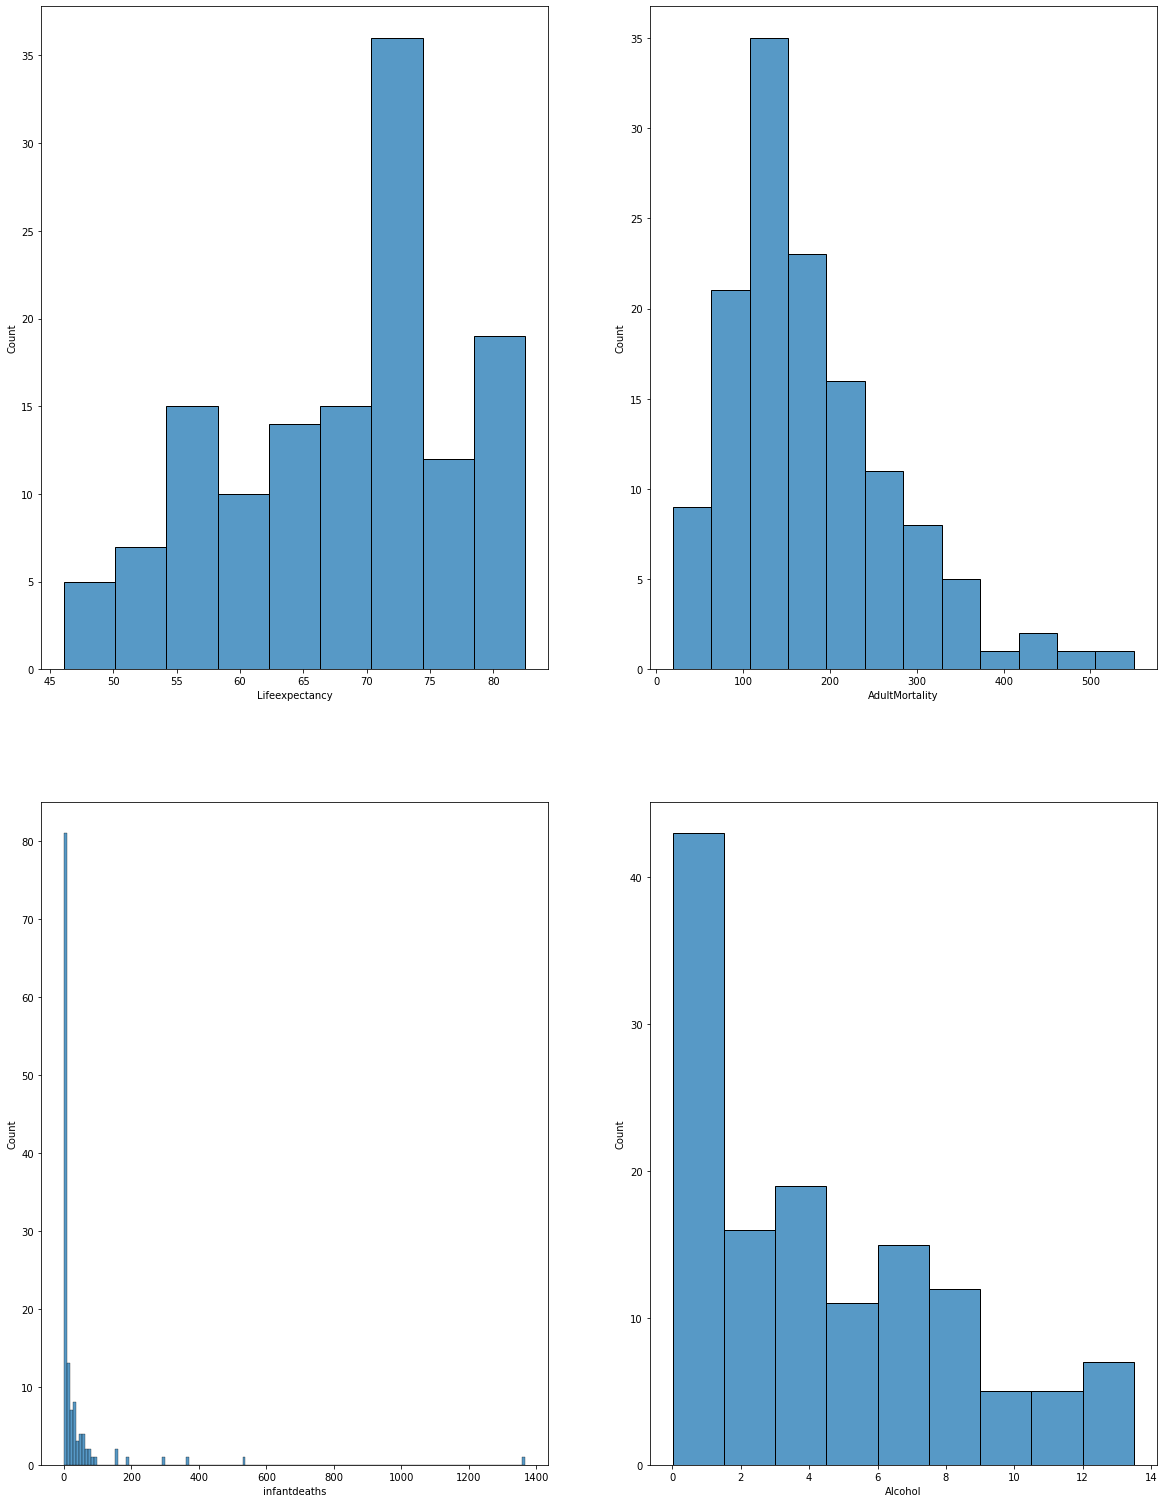

In [78]:
# Plotting
plt.rcParams["figure.figsize"] = (20,100)
thinkplot.preplot(14, 7, 2)
sns.histplot(data = dfLE_clean, x = "Lifeexpectancy")
thinkplot.subplot(2)
sns.histplot(data = dfLE_clean, x = "AdultMortality")
thinkplot.subplot(3)
sns.histplot(data=dfLE_clean, x = "infantdeaths")
thinkplot.subplot(4)
sns.histplot(data=dfLE_clean, x = "Alcohol")


<AxesSubplot:xlabel='Lifeexpectancy', ylabel='Count'>

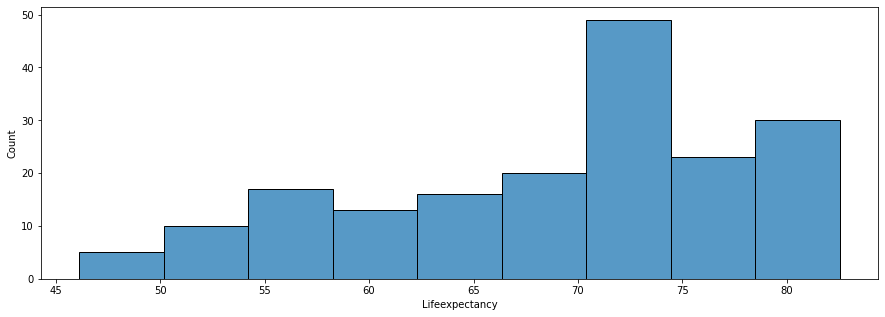

In [20]:
# Plotting
thinkplot.preplot()
sns.histplot(data = dfLE, x = "Lifeexpectancy")

<h2>Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)</h2>
<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it without using a fit() method. Plot the emperical data on the same graph. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 

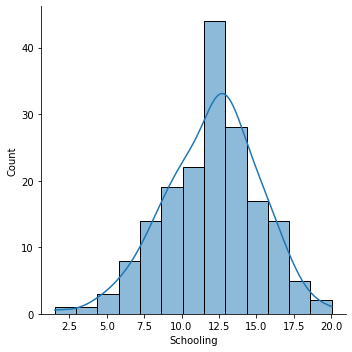

In [22]:
#Analytical for Schooling
sns.displot(dfLE, x = 'Schooling', kde = True)

{'xscale': 'linear', 'yscale': 'linear'}

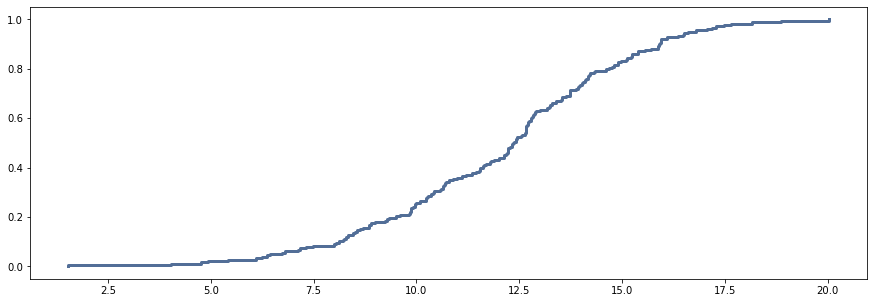

In [23]:
# Schooling
cdf_sch = thinkstats2.Cdf(dfLE['Schooling'])
thinkplot.Cdf(cdf_sch)

In [16]:
# +/- 1 year Canada
Sch_Can = dfLE[dfLE['Country']=='Canada']['Schooling']
Sch_Can


30    15.875
Name: Schooling, dtype: float64

In [44]:
Sch_Can[:1]

30    15.875
Name: Schooling, dtype: float64

In [45]:
# Computing the percent of Countries within +/- 1 year of Canada
print('Percent within +/-1 of Canada: ', round(100*(cdf_sch.Prob(15.875 + 1)-cdf_sch.Prob(15.875 - 1)),2), '%')

Percent within +/-1 of Canada:  14.04 %


<h2>Percent within +/-1 of Canada:  14.04 %

<h2>Part 3: Create another analytical distribution for GDP per Capita (20pts)</h2>
<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 

<AxesSubplot:xlabel='GDP_per_Capita', ylabel='Count'>

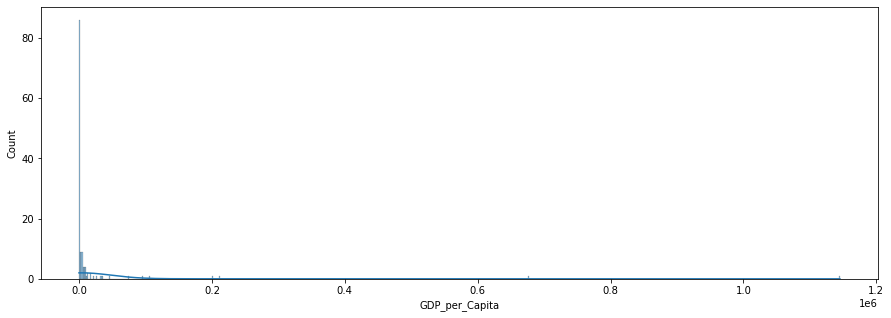

In [61]:
#Analytical for GDP per Capita
sns.histplot(data = dfLE_clean, x = 'GDP_per_Capita', kde = True)

<h2>GDP per capita does not appear to have a normal distribution.
<h2>It might need transformation. We consider log transformation below.

In [50]:
#Analytical for GDP/capita
log_GDPpC = np.log(dfLE_clean["GDP_per_Capita"])

<AxesSubplot:xlabel='GDP_per_Capita', ylabel='Count'>

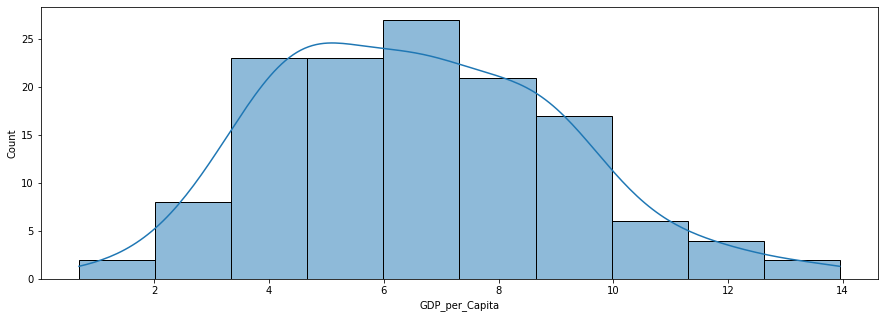

In [60]:
#Plotting the histogram of log transformed GDP per capita
sns.histplot(dfLE, x = log_GDPpC, kde=True)

<h2>Log transformation of GDP per capita appears to be normal. This confirms that log transformation is a good treatment for GDP per capita.

In [52]:
log_GDPpC.mean()

6.60148258373705

In [ ]:
# GDP per Capita
dfLE["GDP_per_Capita"].describe()
dfLE["GDP_per_Capita"].median()

<h2>Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)</h2>
<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 

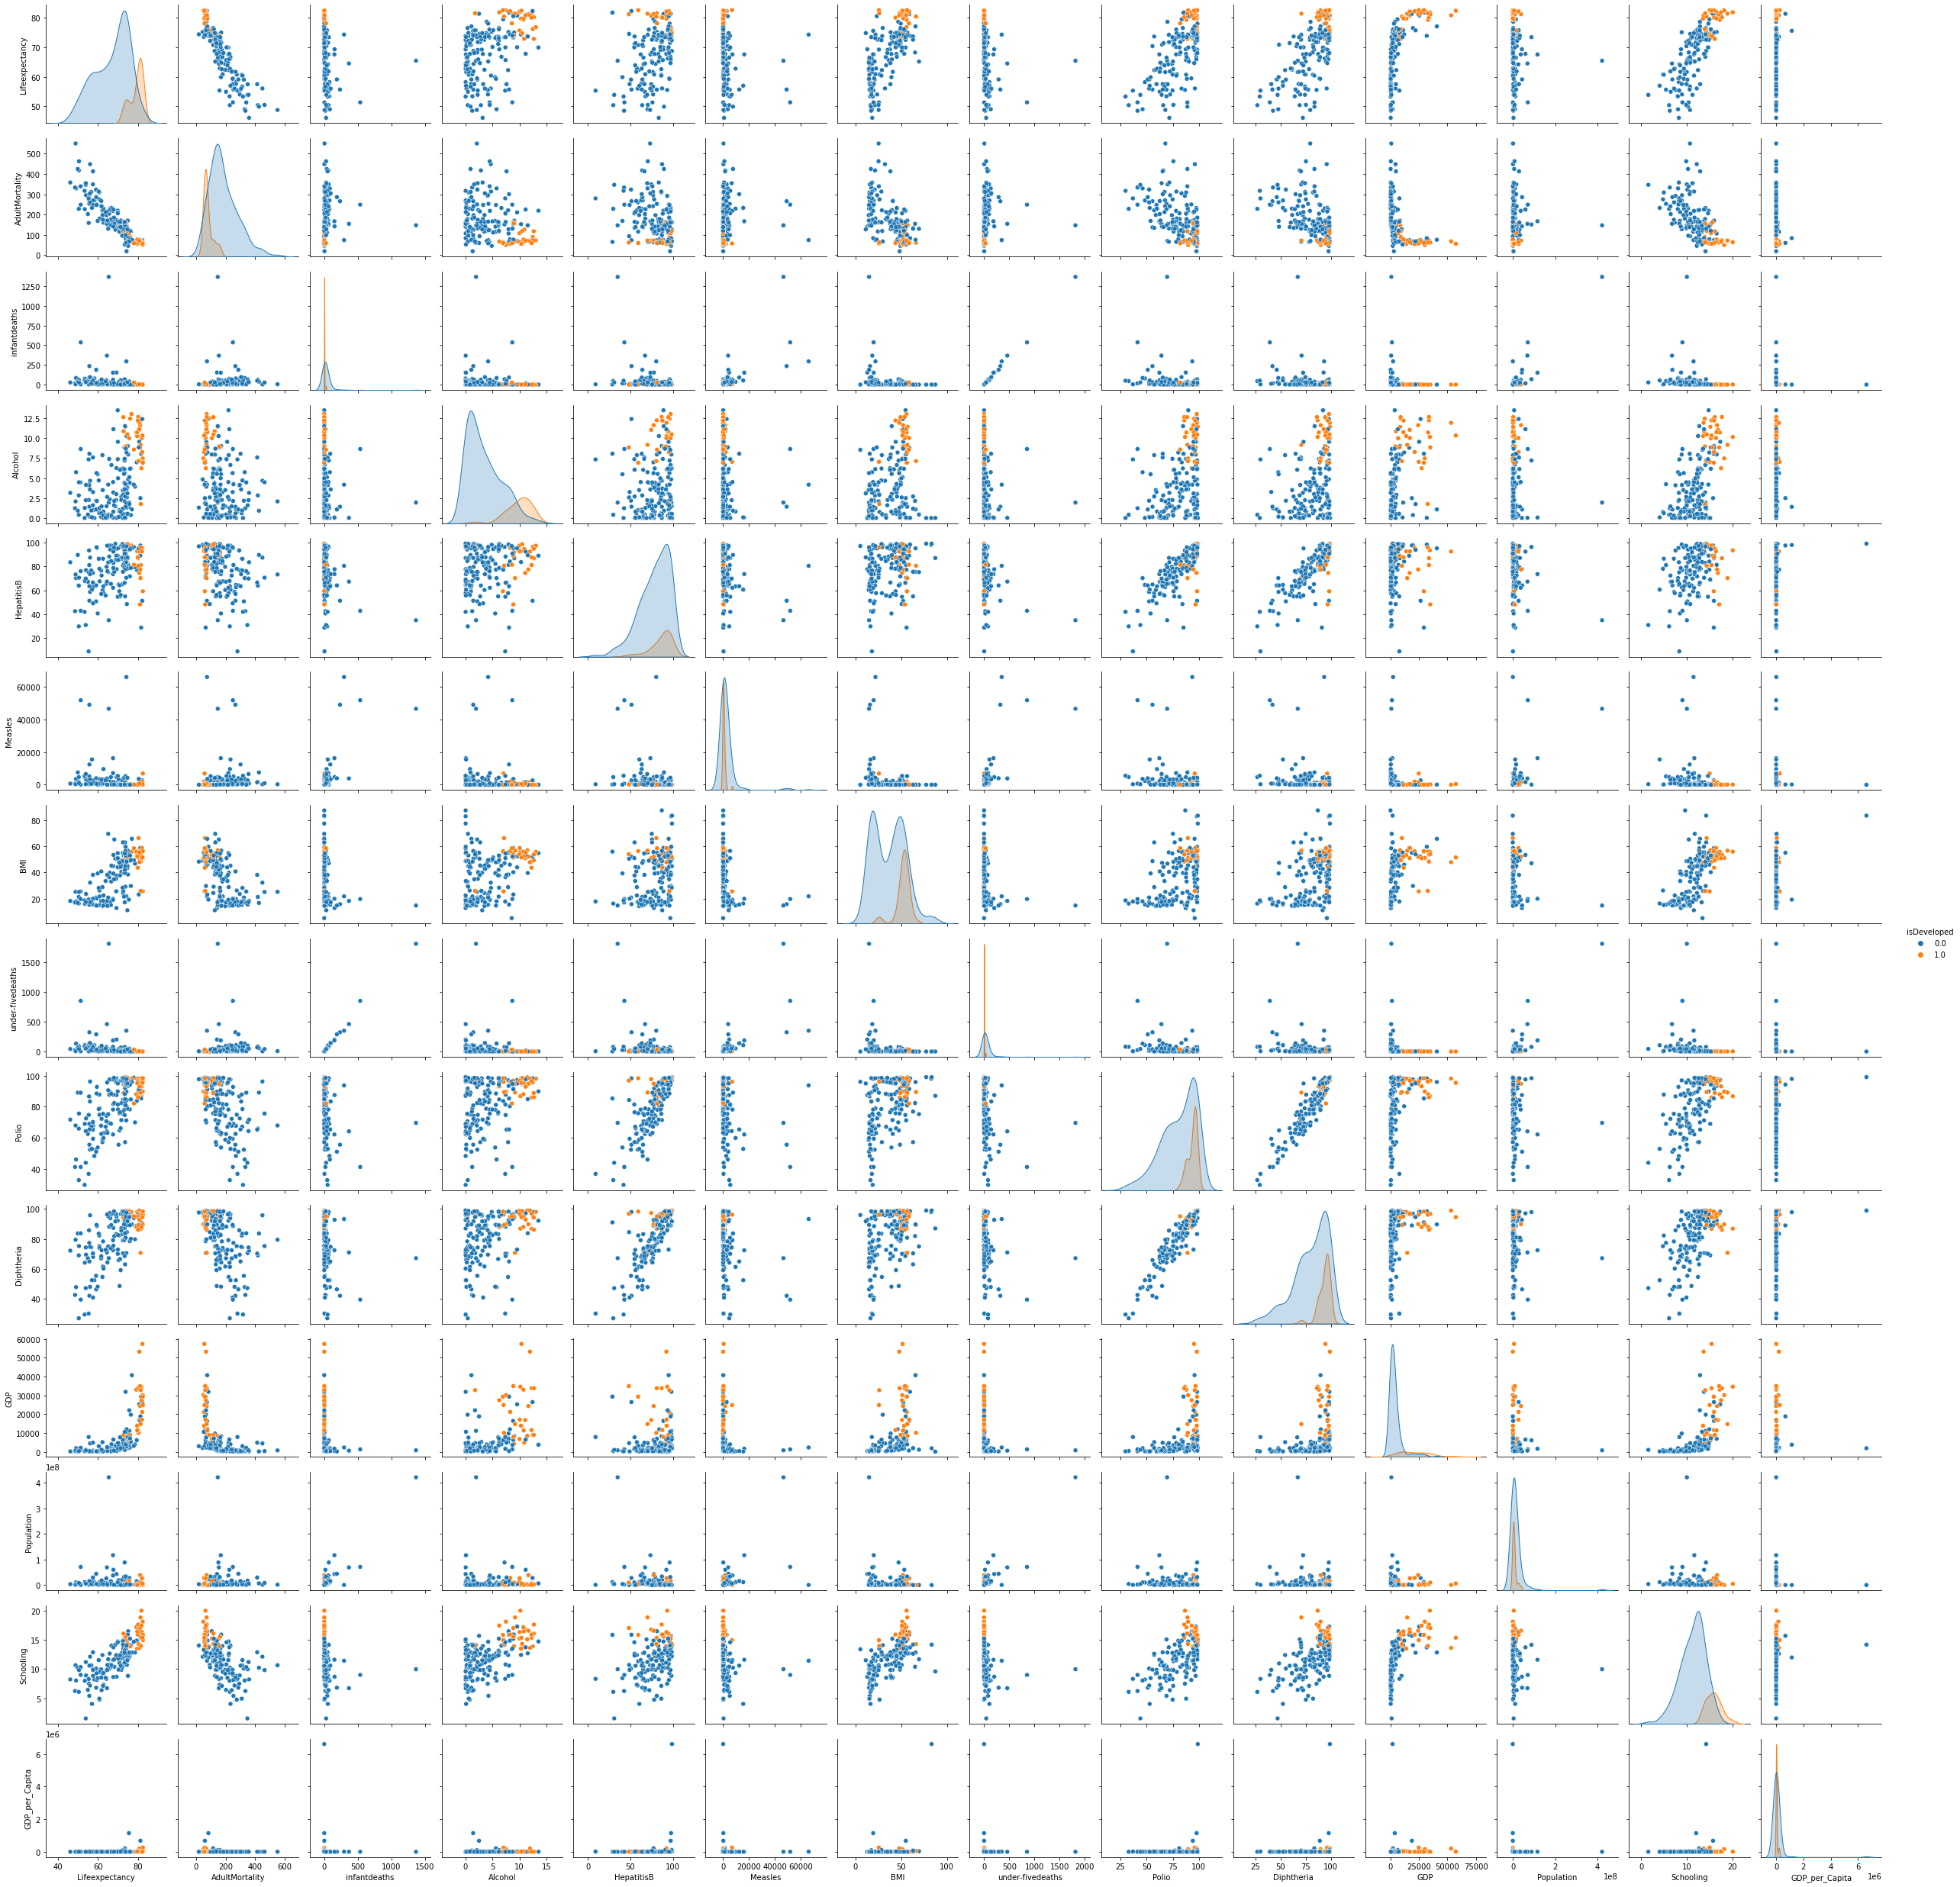

In [34]:
#Visualize correlations. 
sns.pairplot(dfLE, hue='isDeveloped')

In [62]:
columns = dfLE_clean.columns.to_list()
columns

['Country',
 'isDeveloped',
 'Lifeexpectancy',
 'AdultMortality',
 'infantdeaths',
 'Alcohol',
 'HepatitisB',
 'Measles',
 'BMI',
 'under-fivedeaths',
 'Polio',
 'Diphtheria',
 'GDP',
 'Population',
 'Schooling',
 'GDP_per_Capita']

In [64]:
#Function to detect outliers based on 3std from the mean
def detect_outlier_3sd(data, column):
    min_val = data[column].mean() - 3*data[column].std()
    max_val = data[column].mean() + 3*data[column].std()
    outliers = data.index[(data[column] < min_val) | (data[column] > max_val)].tolist()
    return outliers

In [65]:
columns

['Country',
 'isDeveloped',
 'Lifeexpectancy',
 'AdultMortality',
 'infantdeaths',
 'Alcohol',
 'HepatitisB',
 'Measles',
 'BMI',
 'under-fivedeaths',
 'Polio',
 'Diphtheria',
 'GDP',
 'Population',
 'Schooling',
 'GDP_per_Capita']

In [66]:
columns_num = columns[1:len(columns)]

In [32]:
columns_num

['isDeveloped',
 'Lifeexpectancy',
 'AdultMortality',
 'infantdeaths',
 'Alcohol',
 'HepatitisB',
 'Measles',
 'BMI',
 'under-fivedeaths',
 'Polio',
 'Diphtheria',
 'GDP',
 'Population',
 'Schooling',
 'GDP_per_Capita']

In [67]:
# Determine indexes of outliers
outlier_index = []
for column in columns_num:
    tmp_index = detect_outlier_3sd(dfLE_clean,column)
    for j in tmp_index:
        if j not in outlier_index:
            outlier_index.append(j)
        else:
            pass
outlier_index    

[94, 76, 122, 54, 34, 32, 7, 8, 80, 98, 118, 81, 102]

In [68]:
dfLE_clean2 = dfLE_clean.drop(dfLE_clean.index[outlier_index])

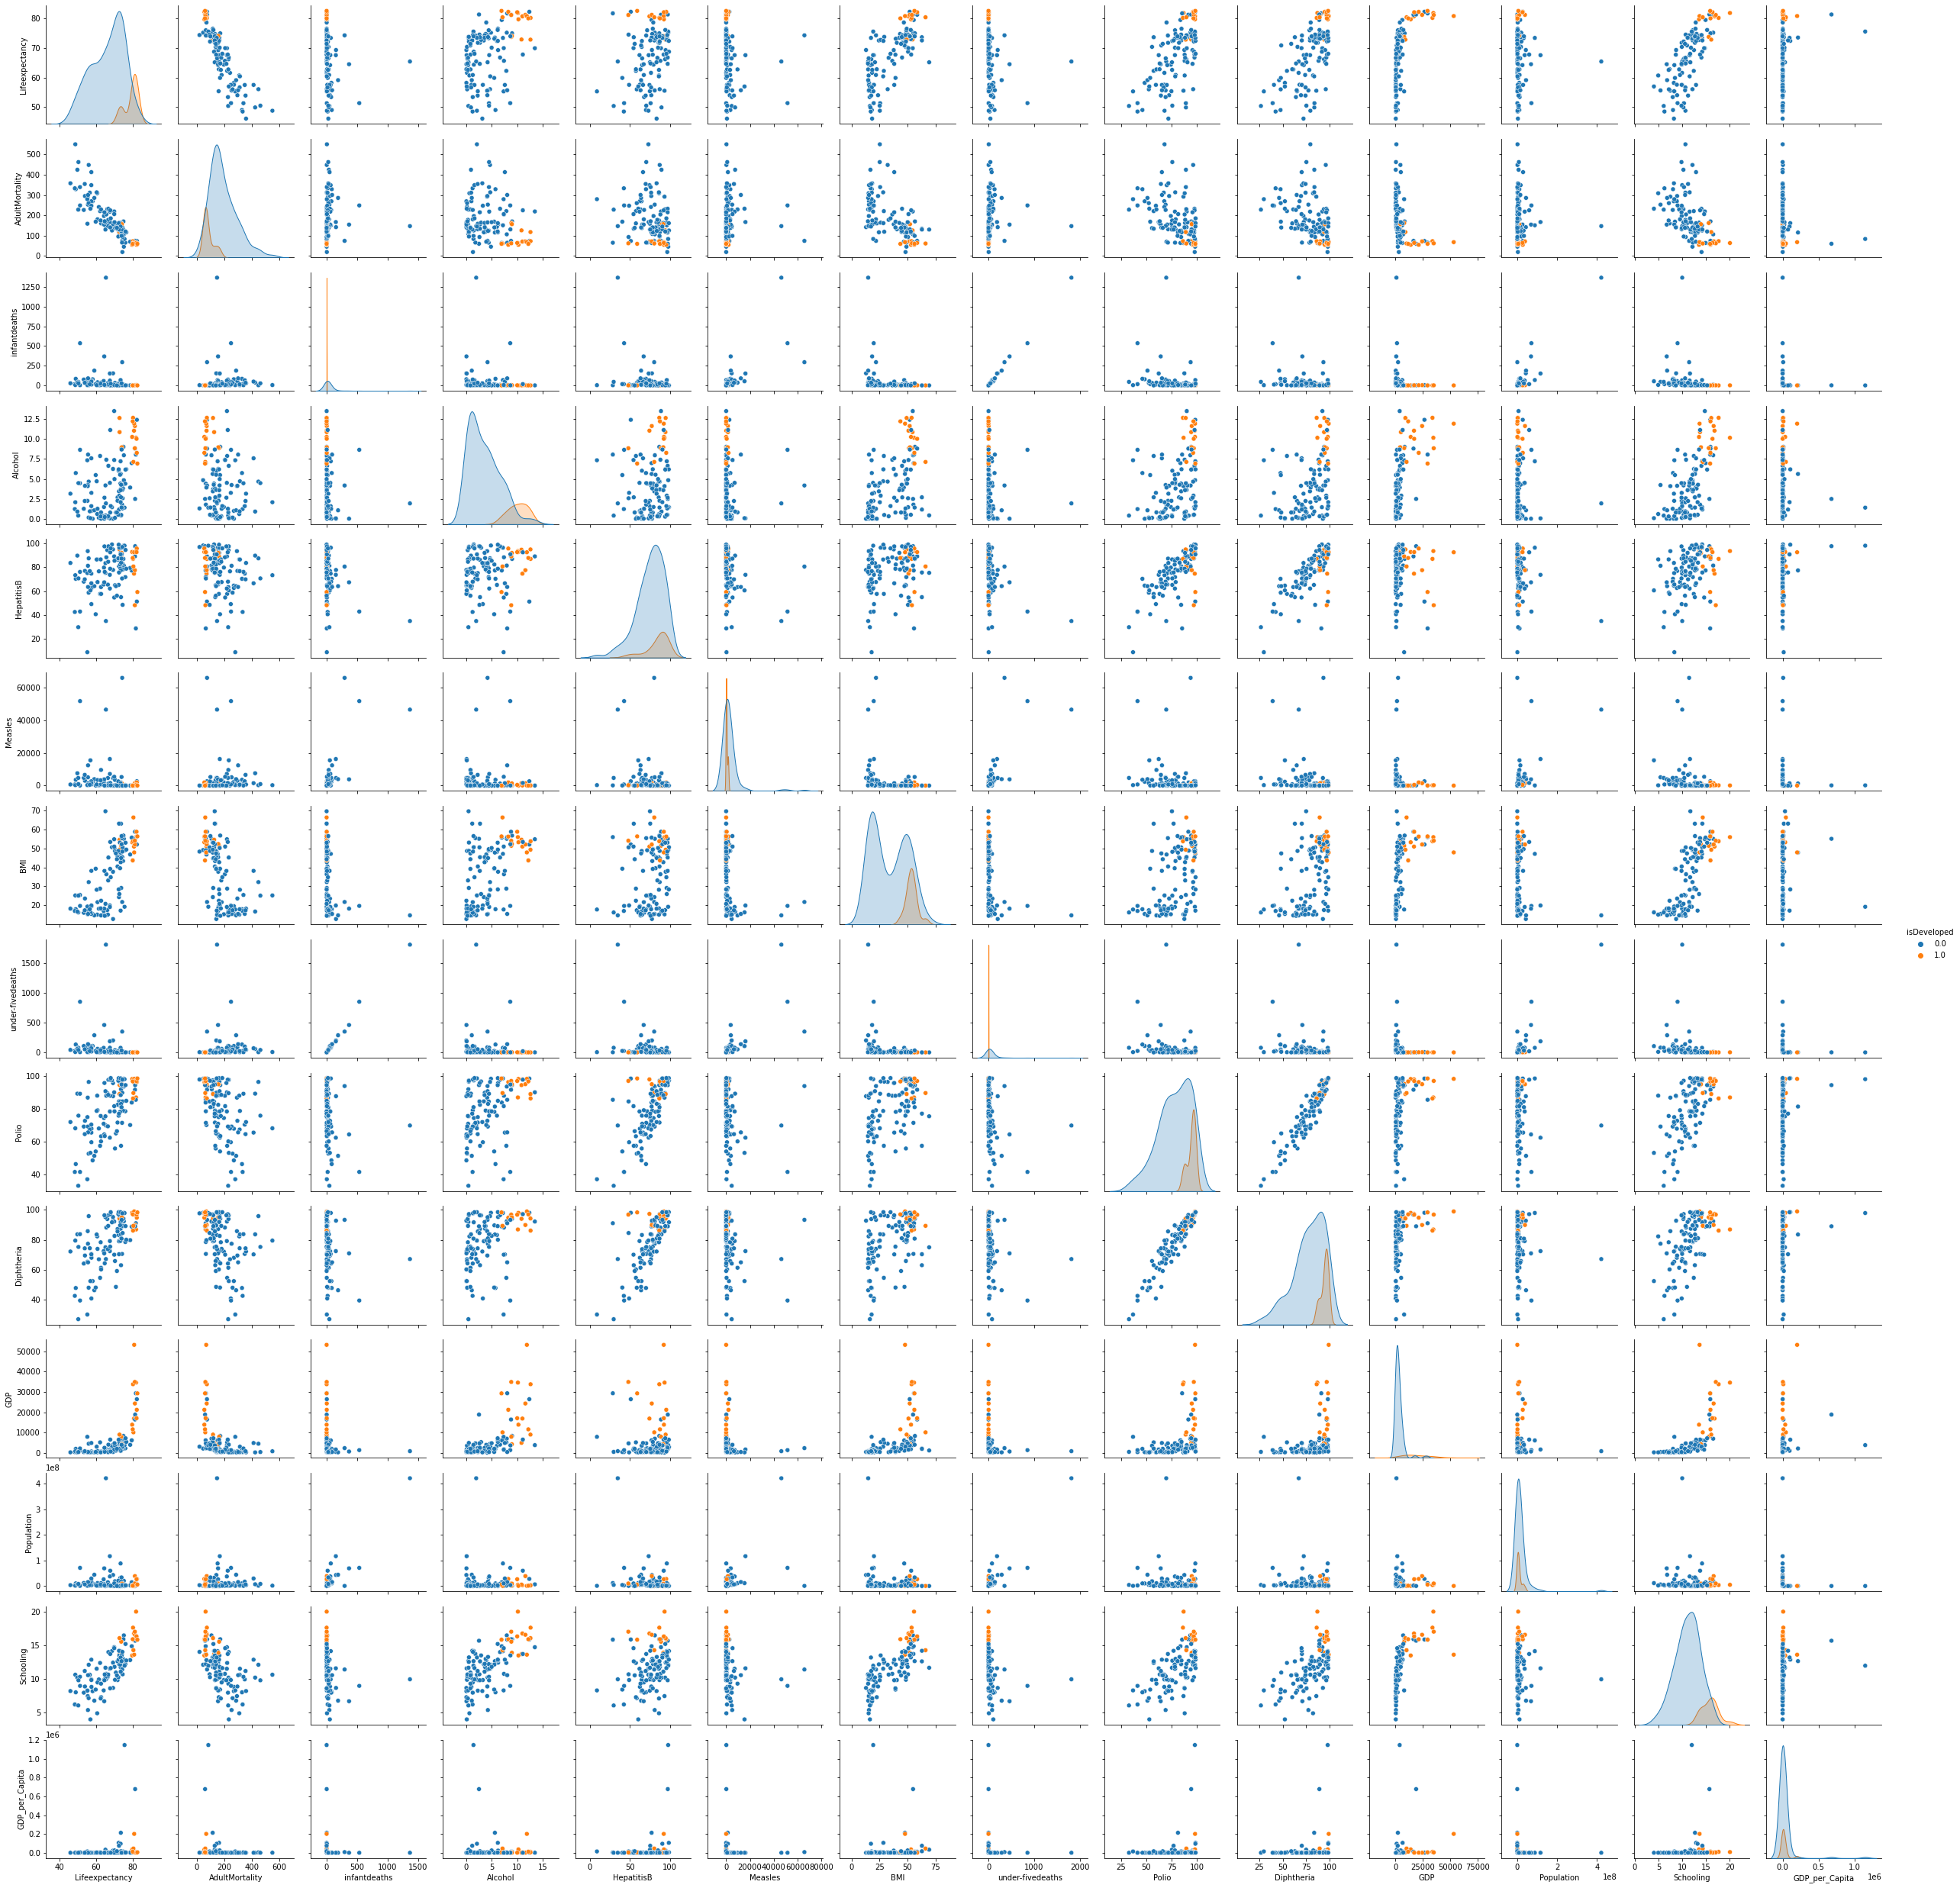

In [69]:
#Visualize correlations. 
sns.pairplot(dfLE_clean2, hue='isDeveloped')

<h2>Part 5: Calculate correlations (25pts)</h2>
<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [43]:
#Calculate correlations and analyze. 
dfLE_dvlped = dfLE[dfLE['isDeveloped']==1]
dfLE_dvlpng = dfLE[dfLE['isDeveloped']==0]

dfLE_dvlped.corr()['Lifeexpectancy']

isDeveloped              NaN
Lifeexpectancy      1.000000
AdultMortality     -0.883067
infantdeaths       -0.054296
Alcohol            -0.345349
HepatitisB         -0.462585
Measles             0.155579
BMI                -0.164733
under-fivedeaths   -0.049539
Polio              -0.102560
Diphtheria         -0.292043
GDP                 0.655427
Population          0.185499
Schooling           0.417589
GDP_per_Capita      0.310971
Name: Lifeexpectancy, dtype: float64

In [42]:
dfLE_dvlpng.corr()['Lifeexpectancy']

isDeveloped              NaN
Lifeexpectancy      1.000000
AdultMortality     -0.875761
infantdeaths       -0.167719
Alcohol             0.253968
HepatitisB          0.439587
Measles            -0.174120
BMI                 0.694751
under-fivedeaths   -0.196396
Polio               0.646052
Diphtheria          0.650166
GDP                 0.507050
Population         -0.005223
Schooling           0.735940
GDP_per_Capita      0.197439
Name: Lifeexpectancy, dtype: float64

In [48]:
lifeexpectancy_corr = pd.DataFrame()
lifeexpectancy_corr["Developed"] = dfLE_dvlped.corr()['Lifeexpectancy']
lifeexpectancy_corr["Developing"] = dfLE_dvlpng.corr()['Lifeexpectancy']
lifeexpectancy_corr["Difference"] = lifeexpectancy_corr["Developed"] - lifeexpectancy_corr["Developing"]
lifeexpectancy_corr

,Developed,Developing,Difference
isDeveloped,NaN,NaN,NaN
Lifeexpectancy,1.000000,1.000000,0.000000
AdultMortality,-0.883067,-0.875761,-0.007306
infantdeaths,-0.054296,-0.167719,0.113423
Alcohol,-0.345349,0.253968,-0.599317
HepatitisB,-0.462585,0.439587,-0.902171
Measles,0.155579,-0.174120,0.329698
BMI,-0.164733,0.694751,-0.859484
under-fivedeaths,-0.049539,-0.196396,0.146857
Polio,-0.102560,0.646052,-0.748613


<h2>3 Strongest Correlation with Life Expectancy
<h3>Developed Countries
<li>Adult Mortality (-)
<li>GDP             (+)
<li>HepatitisB      (-)
</ul>
<h3>Developing Countries
<li>Adult Mortality (-)
<li>Schooling       (+)
<li>BMI             (+)